In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Steel Plate Defect Prediction

[Kaggle competition 'Steel Plate Defect Prediction'](https://www.kaggle.com/competitions/playground-series-s4e3/data?select=test.csv)


---


*Описание исходного датасета:*

Датасет содержит **27 признаков**, которые описывают стальные пластины и, связанные с ними измерения. В качестве ответа **7 классов**,  которые указывают на наличие определенного дефекта.


---


*Задача:*

Построить модель многоклассовой классификации для прогнозирования дефектов стальных пластин


# EDA

In [2]:
data = pd.read_csv('./train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

Данные состоят из 34 колонок:

*   0 - id
*   1-27 - признаки
*   28-34 - таргеты

По информации видим, что все данные представлены в числовом виде.


In [4]:
# признаки (сразу убираем id)
features = data.columns[1:28]
# классы дефектов
targets = data.columns[28:]

## Признаки

### Посмотрим сводную статистику по признакам

In [5]:
data[features[0:10]].describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000


+ "Y" признаки очень сильно выбиваются по масштабу - необходима нормировка данных
+ max, min, sum, perimeter стоит проверить на корреляцию признаков

In [6]:
data[features[10:20]].describe()

,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index
count,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,1459.350747,0.402674,0.596337,76.213122,0.352939,0.409309,0.574520,0.030609,0.614749,0.831652
std,145.568687,0.490449,0.490644,53.931960,0.318976,0.124143,0.259436,0.047302,0.222391,0.220966
min,1227.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.008300,0.001500,0.014400,0.105000
25%,1358.000000,0.000000,0.000000,40.000000,0.058600,0.317500,0.375750,0.006600,0.451600,0.655200
50%,1364.000000,0.000000,1.000000,69.000000,0.238500,0.413500,0.545400,0.009500,0.636400,0.964300
75%,1652.000000,1.000000,1.000000,80.000000,0.656100,0.494600,0.818200,0.019100,0.785700,1.000000
max,1794.000000,1.000000,1.000000,300.000000,0.995200,0.927500,1.000000,0.665100,1.000000,1.000000


+ "TypeOfSteel_A300", "TypeOfSteel_A400", возможно, бинарные признаки


In [7]:
data[features[20:]].describe()

,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,0.591899,2.473475,1.312667,1.389737,0.102742,-0.138382,0.571902
std,0.482050,0.760575,0.467848,0.405549,0.487681,0.120344,0.332219
min,0.000000,0.778200,0.301000,0.000000,-0.988400,-0.885000,0.119000
25%,0.000000,1.949400,1.000000,1.079200,-0.272700,-0.192500,0.253200
50%,1.000000,2.227900,1.146100,1.322200,0.111100,-0.142600,0.472900
75%,1.000000,2.814900,1.431400,1.707600,0.529400,-0.084000,0.999400
max,1.000000,4.554300,2.997300,4.033300,0.991700,0.642100,1.000000


+ "LogOfAreas", "SigmoidOfAreas" - похожи на производные признаки от Areas, тоже стоит проверить на мультиколлинеарность

Вывод:
+ нормировка
+ проверка на мультиколлинеарность

### Отрисуем признаки на графиках

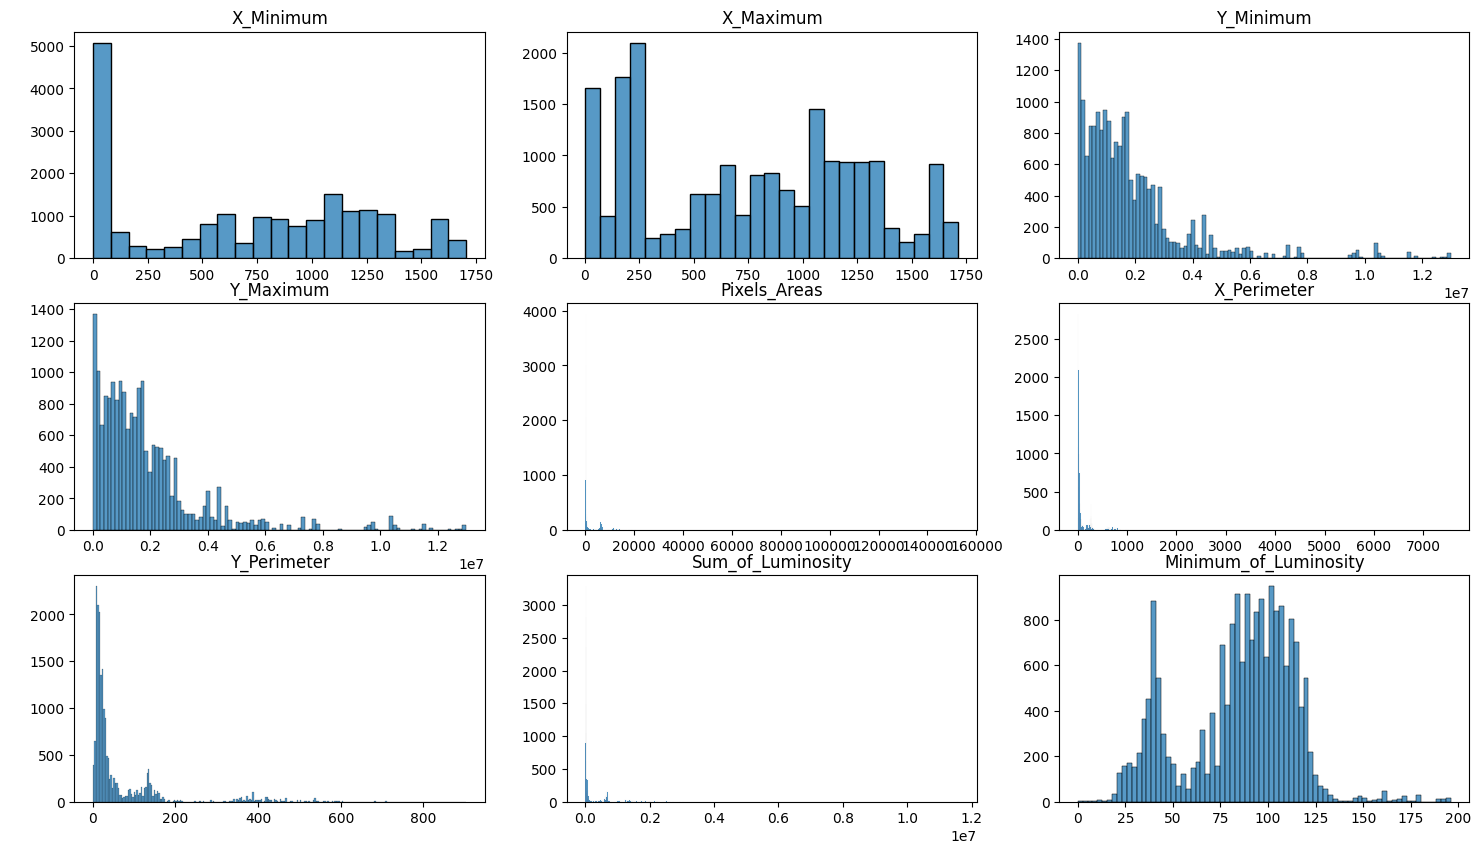

In [8]:
fig, ax = plt.subplots(3,3,figsize=(18,10))
for i in range(len(features[:9])):
    sns.histplot(data[features[i]],ax=ax[i//3,i%3])
    ax[i//3,i%3].set_title(features[i])
    ax[i//3,i%3].set_ylabel(' ')
    ax[i//3,i%3].set_xlabel(' ')

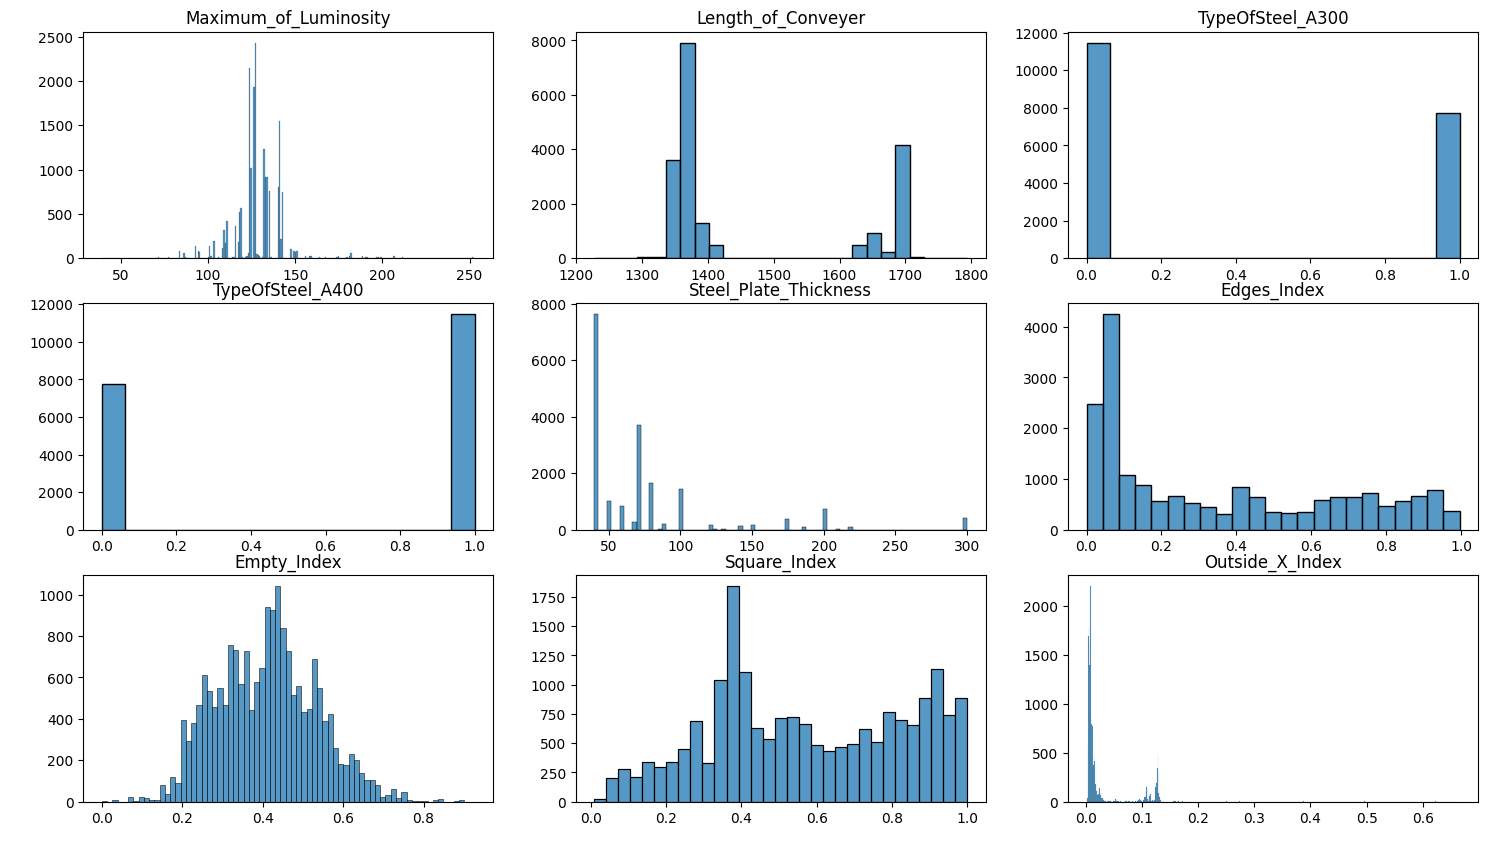

In [9]:
fig, ax = plt.subplots(3,3,figsize=(18,10))
for i in range(len(features[9:18])):
    sns.histplot(data[features[i+9]],ax=ax[i//3,i%3])
    ax[i//3,i%3].set_title(features[i+9])
    ax[i//3,i%3].set_ylabel(' ')
    ax[i//3,i%3].set_xlabel(' ')

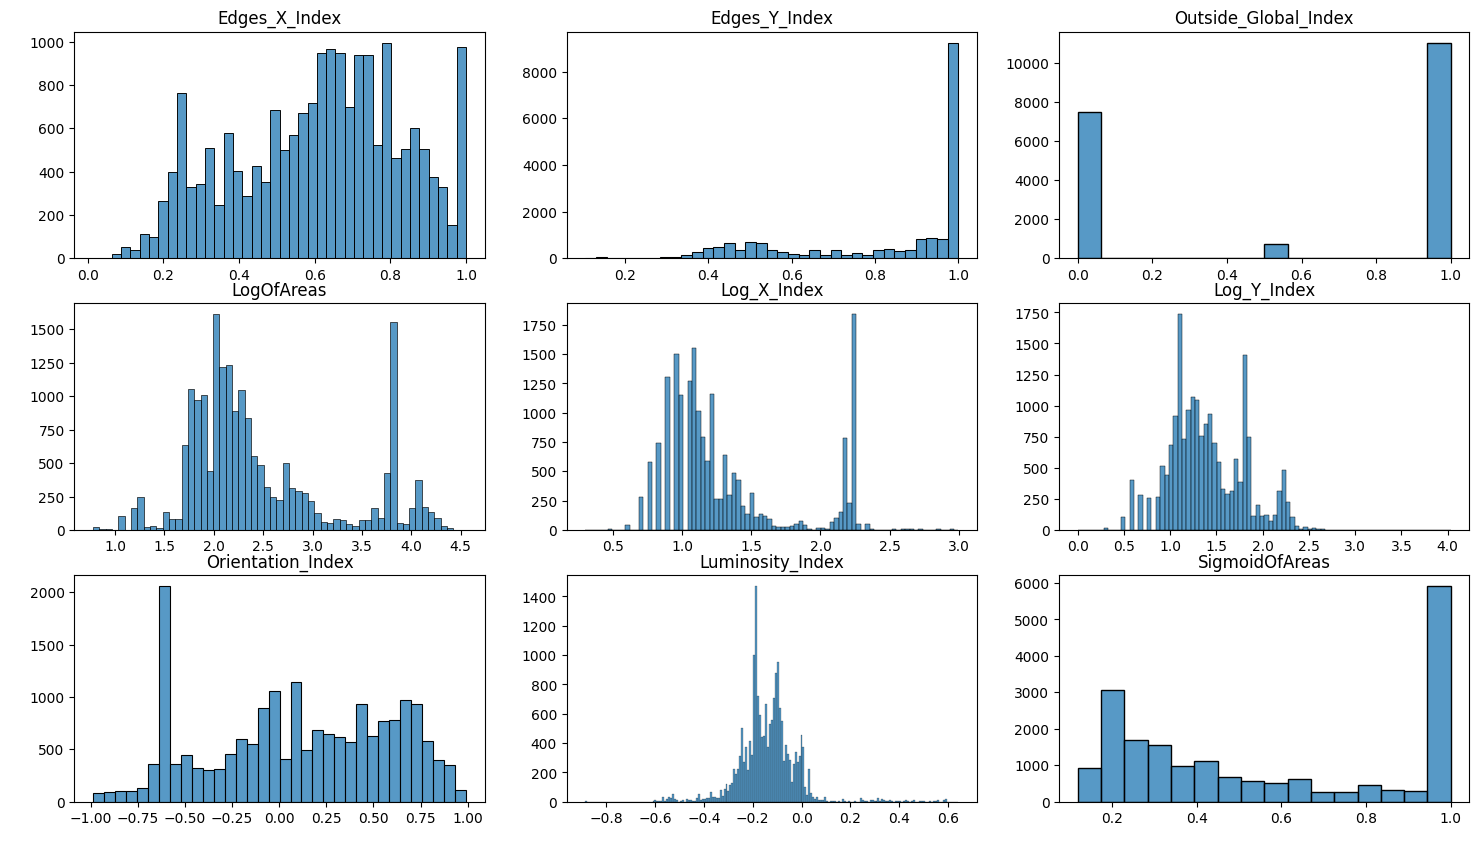

In [10]:
fig, ax = plt.subplots(3,3,figsize=(18,10))
for i in range(len(features[18:])):
    sns.histplot(data[features[i+18]],ax=ax[i//3,i%3])
    ax[i//3,i%3].set_title(features[i+18])
    ax[i//3,i%3].set_ylabel(' ')
    ax[i//3,i%3].set_xlabel(' ')

Вывод по графикам:

+ "X_Perimeter", "Pixels_Areas", "Sum_Of_Luminosity" - проверить на выбросы
+ "Outside_Global_Index" - категориальная (3 категории)?
+ "TypeOfSteel_X" - бинарные

### Выбросы

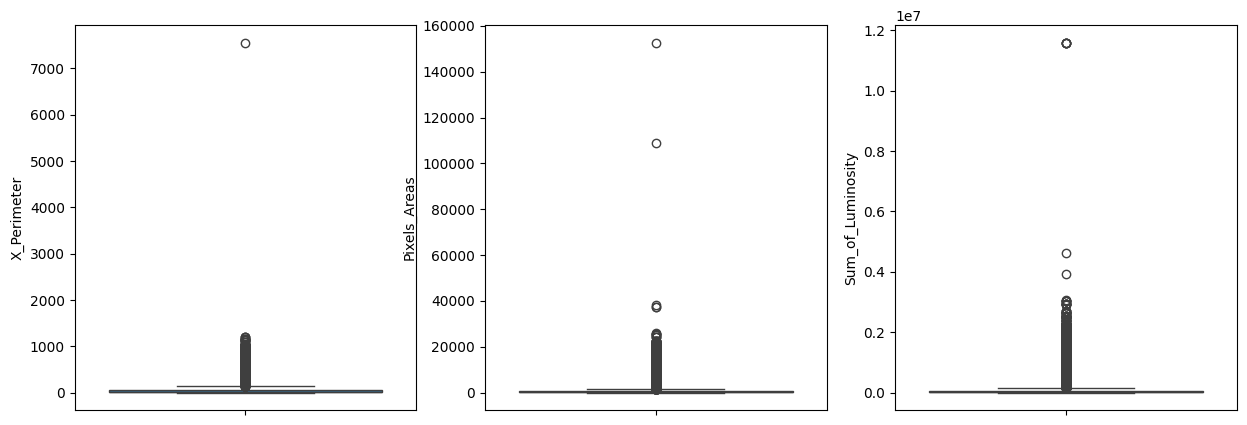

In [11]:
cols = "X_Perimeter", "Pixels_Areas", "Sum_of_Luminosity"
fig,ax = plt.subplots(1,3,figsize=(15,5))
for i in range(len(cols)):
    sns.boxplot(data[cols[i]],ax=ax[i])

Посмотрим, что будет если отбросим 1% экстремальных значений

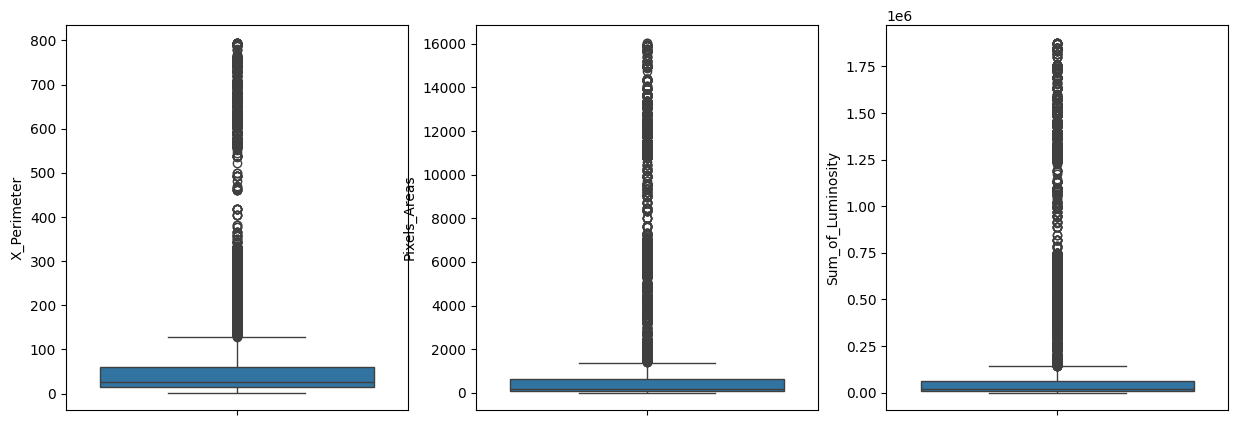

In [12]:
cols = "X_Perimeter", "Pixels_Areas", "Sum_of_Luminosity"
fig,ax = plt.subplots(1,3,figsize=(15,5))
k = int(data.shape[0]*0.99)
for i in range(len(cols)):
    sns.boxplot(data[cols[i]].sort_values()[:k],ax=ax[i])

Графики получаются лучше, но теперь видно, что присутствсуют длинные "хвосты" распределения

Применим **log1p** преобразование

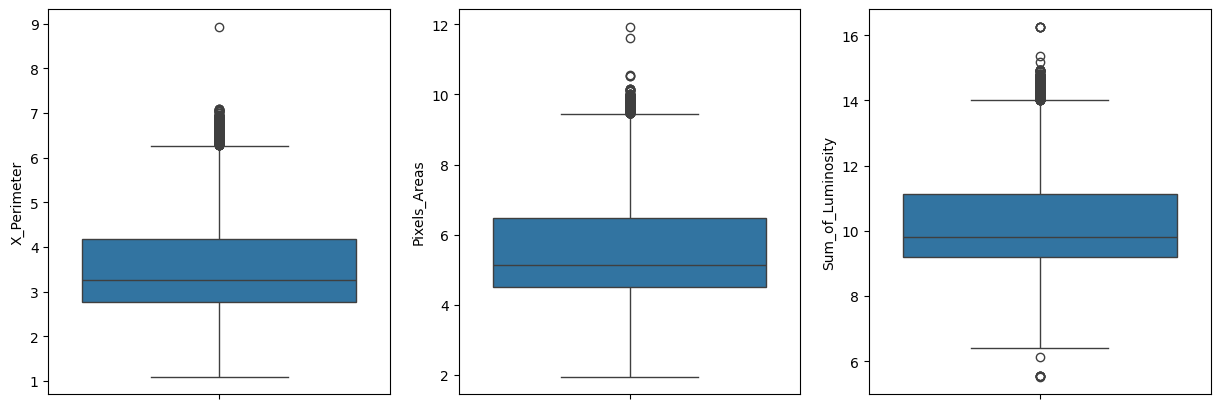

In [13]:
cols = "X_Perimeter", "Pixels_Areas", "Sum_of_Luminosity"
fig,ax = plt.subplots(1,3,figsize=(15,5))
for i in range(len(cols)):
    sns.boxplot(np.log1p(data[cols[i]]),ax=ax[i])

Вывод:

Думаю оставить строки, как есть, но применить к столбцам **log1p** преобразование, чтобы избавиться от влияние "хвостов"

### Бинарные и категориальные переменные

In [14]:
feature = 'Outside_Global_Index'
data[feature].value_counts()

,count
Outside_Global_Index,
1.0,11022
0.0,7490
0.5,706
0.7,1


In [15]:
feature = 'TypeOfSteel_A300'
data[feature].value_counts()

,count
TypeOfSteel_A300,
0,11480
1,7739


In [16]:
feature = 'TypeOfSteel_A400'
data[feature].value_counts()

,count
TypeOfSteel_A400,
1,11461
0,7758


Вывод:

"TypeOfSteel_X" - бинарные

"Outside_Global_Index" - непонятен тип признака, возможно категориальный

### Корреляция

Посчитаем корреляцию и выделим те значения, которые больше 80%

<Axes: >

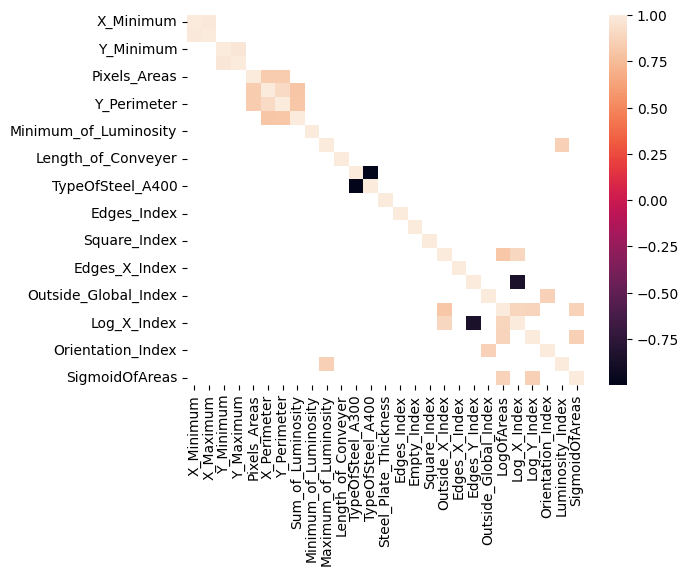

In [17]:
p = 0.8
sns.heatmap(data[features].corr(),mask=np.abs(data[features].corr())<p)

Посмотрим на все такие пары

In [18]:
data_corr = data[features].corr()
idx = np.where(np.abs(data_corr.mask(np.eye(len(data_corr), dtype=bool)))>p)

pairs = list(set(tuple(sorted(x)) for x in list(zip(idx[0], idx[1]))))
pd.Series(pairs)

for i,j in pairs:
    print(features[i],'\t\t',features[j],'\t\t',data_corr.loc[features[i],features[j]])

X_Minimum 		 X_Maximum 		 0.9897672786491646
LogOfAreas 		 SigmoidOfAreas 		 0.8724531424401515
Outside_Global_Index 		 Orientation_Index 		 0.8639872069439484
Log_Y_Index 		 SigmoidOfAreas 		 0.8524500761700224
Pixels_Areas 		 Y_Perimeter 		 0.8345434453321343
LogOfAreas 		 Log_X_Index 		 0.8882390325856594
Maximum_of_Luminosity 		 Luminosity_Index 		 0.8538555122645558
X_Perimeter 		 Sum_of_Luminosity 		 0.8020724927380157
Y_Minimum 		 Y_Maximum 		 0.9695524650996821
Y_Perimeter 		 Sum_of_Luminosity 		 0.8091705936142481
Pixels_Areas 		 X_Perimeter 		 0.835078733573749
TypeOfSteel_A300 		 TypeOfSteel_A400 		 -0.9977316148553689
Outside_X_Index 		 Log_X_Index 		 0.8983409899912759
X_Perimeter 		 Y_Perimeter 		 0.9125793077170433
Edges_Y_Index 		 Log_X_Index 		 -0.8518128006577472
Outside_X_Index 		 LogOfAreas 		 0.8119602292784268
LogOfAreas 		 Log_Y_Index 		 0.8792281394891333


In [19]:

indx_x = list(map(lambda x:(features[x[0]],features[x[1]]),pairs))
vals_x = list(map(lambda x:data_corr.loc[x[0],x[1]],indx_x))

pd.Series(data=vals_x,index=indx_x,name='corr').sort_values(ascending=False)

,corr
"(X_Minimum, X_Maximum)",0.989767
"(Y_Minimum, Y_Maximum)",0.969552
"(X_Perimeter, Y_Perimeter)",0.912579
"(Outside_X_Index, Log_X_Index)",0.898341
"(LogOfAreas, Log_X_Index)",0.888239
"(LogOfAreas, Log_Y_Index)",0.879228
"(LogOfAreas, SigmoidOfAreas)",0.872453
"(Outside_Global_Index, Orientation_Index)",0.863987
"(Maximum_of_Luminosity, Luminosity_Index)",0.853856
"(Log_Y_Index, SigmoidOfAreas)",0.852450


Вывод:

Координаты сильно коррелируют друг с другом, площадь и периметр коррелируют между собой

Думаю стоит преобразовать сильно коррелирующие столбцы в один, и удалить некоторые другие

In [20]:
# X Y максимум и минимум
data_new = data[features]
data_new['X_sum'] = (data_new['X_Minimum'] + data_new['X_Maximum'])/2
data_new['Y_sum'] = (data_new['Y_Minimum'] + data_new['Y_Maximum'])/2

# периметер
data_new['Mean_perimeter'] = (data_new['X_Perimeter'] + data_new['Y_Perimeter'])/2

# удалим некоторые столбцы
data_new = data_new.drop(['LogOfAreas','Luminosity_Index','Log_Y_Index','Log_X_Index','Edges_Y_Index','Outside_Global_Index'],axis=1)

# удалим использованные
data_new = data_new.drop(['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','X_Perimeter','Y_Perimeter'],axis=1)

<ipython-input-20-7c583a8605a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['X_sum'] = (data_new['X_Minimum'] + data_new['X_Maximum'])/2
<ipython-input-20-7c583a8605a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Y_sum'] = (data_new['Y_Minimum'] + data_new['Y_Maximum'])/2
<ipython-input-20-7c583a8605a8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [21]:
(data['TypeOfSteel_A300']+data['TypeOfSteel_A400']).value_counts()

,count
1,19198
0,20
2,1


Возможно данные зашумлены или есть какой-то 3 тип стали, думаю стоит удалить строки, где типы стали совпадают

In [22]:
data_new = data_new.drop(data[data['TypeOfSteel_A300']+data['TypeOfSteel_A400'] != 1].index)
data_new = data_new.drop('TypeOfSteel_A300',axis=1)

Еще раз проверим корреляцию признаков в новом датасете

<Axes: >

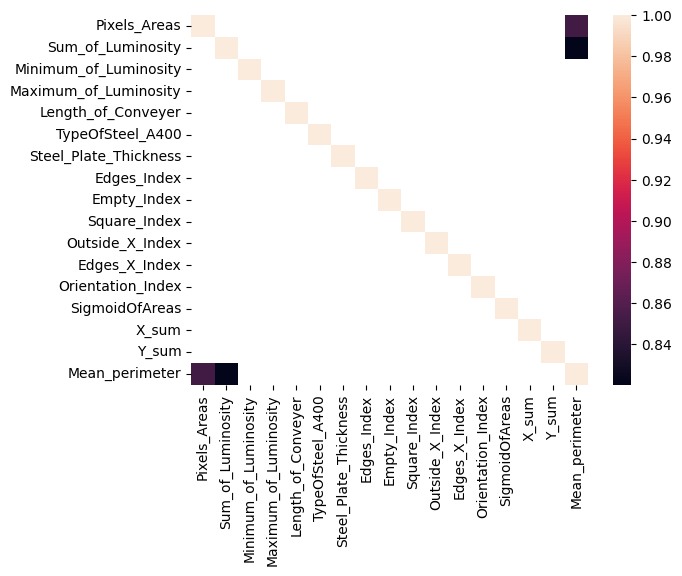

In [23]:
p = 0.8
sns.heatmap(data_new.corr(),mask=np.abs(data_new.corr())<p)

Вывод:

Думаю стоит убрать периметер вообще

### Пропуски

In [24]:
data.isnull().sum().sum()

np.int64(0)

Вывод:

Пропусков нет

## Таргеты

In [25]:
data[targets].describe()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


По сводным статистикам ничего особенного нет

In [26]:
data[targets].sum(axis=1).value_counts()

,count
1,18380
0,818
2,21


Чаще всего в ответе 1 класс

<Axes: >

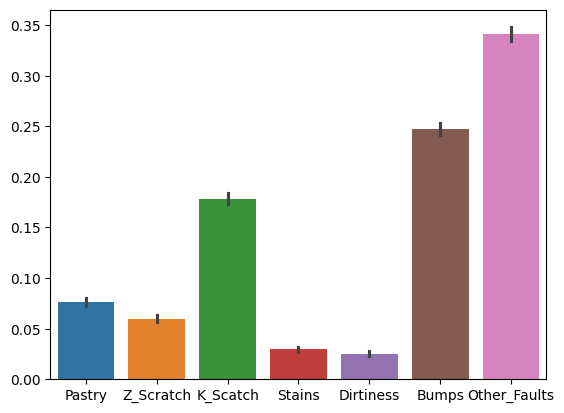

In [27]:
sns.barplot(data[targets])

Видно, что классы плохо сбалансированы

# Суммарный итог по EDA


+ избавиться от мультиколлинеарности признаков
+ пропусков в данных нет
+ нормировка признаков
+ не забывать про дисбаланс классов

# Преобразования на основе EDA

In [28]:
def prepare_data(data,scalers,filename,train=True):
    data_new = data.copy()

    # X Y максимум и минимум
    data_new['X_sum'] = (data_new['X_Minimum'] + data_new['X_Maximum'])/2
    data_new['Y_sum'] = (data_new['Y_Minimum'] + data_new['Y_Maximum'])/2

    # периметер
    #data_new['Mean_perimeter'] = (data_new['X_Perimeter'] + data_new['Y_Perimeter'])/2

    # удалим некоторые столбцы
    data_new = data_new.drop(['LogOfAreas','Luminosity_Index','Log_Y_Index','Log_X_Index','Edges_Y_Index','Outside_Global_Index'],axis=1)

    # удалим использованные
    data_new = data_new.drop(['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','X_Perimeter','Y_Perimeter'],axis=1)

    data_new = data_new.drop(['id'],axis=1)

    # только для обучения
    if train:
        data_new = data_new.drop(data_new[data_new['TypeOfSteel_A300']+data_new['TypeOfSteel_A400'] != 1].index)

    data_new = data_new.drop(['TypeOfSteel_A300'],axis=1)


    cols = ["Pixels_Areas", "Sum_of_Luminosity"]
    for col in cols:
        data_new[col] = np.log1p(data_new[col])

    # scale
    features = list(set(data_new.columns)-set(targets)-{'TypeOfSteel_A400'})
    features.sort()
    for scaler in scalers:
        if train:
            data_new[features] = scaler.fit_transform(data_new[features])
        else:
            data_new[features] = scaler.transform(data_new[features])

    #

    # save
    data_new.to_csv(filename,index=False)

In [29]:
test_data = pd.read_csv('test.csv')

In [30]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalers = [MinMaxScaler(feature_range=(-1, 1))]
scalers = [StandardScaler()]
prepare_data(data,scalers,'ready_train.csv')
prepare_data(pd.read_csv('./test.csv'),scalers,'ready_test.csv',train=False)

In [31]:
pd.read_csv('ready_test.csv')

,Pixels_Areas,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Orientation_Index,SigmoidOfAreas,X_sum,Y_sum
0,0.455149,0.366509,-0.620536,-0.115630,1.349841,1,1.367040,0.108108,0.647371,-0.953029,-0.445097,-0.223730,1.168504,1.041036,0.567032,1.048591
1,0.124376,0.103994,0.248393,0.236473,-0.724051,1,-0.671996,-0.596643,0.035162,-1.853292,-0.546701,-1.680403,1.647553,1.020560,1.033694,-0.757447
2,-0.017067,-0.061148,0.561207,0.377314,-0.682848,1,-0.671996,-0.916415,1.725181,-0.378943,-0.318091,-0.067176,-1.285187,0.240674,1.230081,-0.917686
3,-0.749448,-0.760497,0.769750,0.799838,1.583325,0,0.440206,0.284296,-0.611686,0.939643,-0.567869,0.832560,0.161804,-1.103200,-1.107117,-0.856872
4,-0.431151,-0.423867,0.630722,0.377314,1.569591,0,-0.301262,1.460553,-1.186840,-0.562465,-0.311741,1.021954,-1.382801,-0.465139,-0.305042,-0.691487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,0.028590,-0.236041,-0.203450,-1.805724,-0.730918,1,-0.115895,-0.212917,-0.839653,-1.313134,-0.379477,-0.938571,1.360042,0.957326,0.731336,-0.742602
12810,-0.921775,-1.040179,0.978293,0.870258,-0.669114,1,-0.671996,-1.074106,-1.058760,-1.143877,-0.536118,0.732689,1.270015,-1.132408,1.098832,0.689644
12811,2.306449,2.296038,-2.115094,1.011099,-0.408160,1,-0.671996,-0.932717,1.249914,1.398064,1.970131,-1.777125,-0.340008,1.290359,-1.180033,-0.138544
12812,0.148621,0.067892,-0.655293,-0.326892,-0.655379,1,-0.671996,-1.065641,-1.835299,-1.621575,-0.445097,-1.683552,1.524100,0.641156,1.170776,-0.607791
